# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [ ]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = R**D * np.pi**(D/2) / sp.gamma(1 + D/2)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

In [66]:
print("for d=1:", "value =", getSphereVolumeExact(1), "error =", getSphereVolumeExact(1)-1)
print("for d=2:", "value =", getSphereVolumeExact(2), "error =", getSphereVolumeExact(2)-np.pi)
print("for d=3:", "value =", getSphereVolumeExact(3), "error =", getSphereVolumeExact(3)-4/3*np.pi)


for d=1: value = 2.0 error = 1.0
for d=2: value = 3.141592653589793 error = 0.0
for d=3: value = 4.188790204786391 error = 8.881784197001252e-16


Точность порядка машинного $\epsilon$

Text(0, 0.5, 'V (объем)')

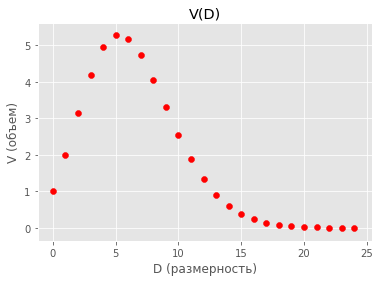

In [67]:
for d in range(25):
    plt.scatter(d, getSphereVolumeExact(d), color = 'red')
plt.title('V(D)')
plt.xlabel("D (размерность)")
plt.ylabel("V (объем)")



### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [74]:
def getSphereVolumePseudorandom(N, D, R = 1):
    rand = np.random.uniform(low=-R, high=R, size=(N,D)) 
    data = 0
    for i in range(N):
        if np.linalg.norm(rand[i,:]) <= R:
            data += 1
    V = (2*R)**D*data/N
    return V


Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

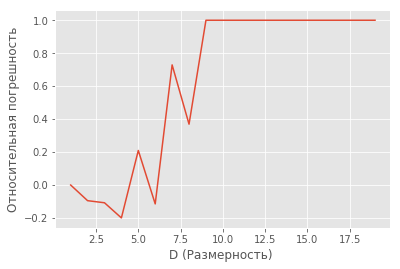

In [100]:
r = 1
D = []
eps = []
for d in range(1, 20):
    D.append(d)
    eps.append(1 - (getSphereVolumePseudorandom(n, d, r))/ getSphereVolumeExact(d, r))
plt.plot(D, eps)
plt.xlabel('D (Размерность) ')
plt.ylabel('Относительная погрешность')
plt.show()

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [101]:
!pip install sobol_seq
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [102]:
sobol_seq.i4_sobol_generate?


In [103]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    rand = np.random.uniform(low=-R, high=R, size=(N,D)) 
    inside = 0
    for i in range(N):
        if np.linalg.norm(q[i,:]) <= R: #проверка попадания в шар - длина радиус-вектора точки меньше нуля
            inside += 1
    V = (2*R)**D*inside/N
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

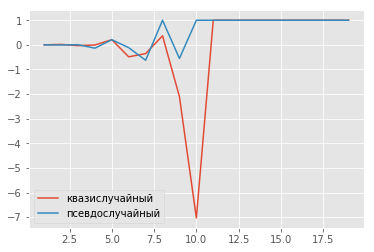

In [135]:
D = []
p_eps = []
rand_eps = []
for d in range(1, 20):
    D.append(d)
    p_eps.append(1 - (getSphereVolumePseudorandom(n, d, r))/ getSphereVolumeExact(d, r))
    rand_eps.append(1 - (getSphereVolumePseudorandom(n, d, r))/ getSphereVolumeExact(d, r))
plt.plot(D, rand_eps, label = 'квазислучайный')
plt.plot(D, p_eps, label = 'псевдослучайный')
plt.legend()
plt.show()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Квазикласика дает более точные результаты, чем псевдослучайная последовательность. Но работают оба варианта только при достаточно малой размерности пространства

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [146]:
def getInitialState(N):
    return 2*np.random.randint(-1,1, size=(N,N)) + 1

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [147]:
def getDeltaE(i, j, state):
    N = len(state)
    state1 = np.hstack((state[:, N-1].reshape(N, -1), state, state[:, 0].reshape(N, -1)))
    state2 = np.vstack((state1[N-1, :], state1, state1[0, :]))
    i+=1
    j+=1
    E = -state2[i,j]*np.sum(state2[i+1,j]+state2[i-1,j]+state2[i,j+1]+state2[i,j-1])
    dE = -2*E
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [166]:
def makeFlip(T, state):

    N = state.shape[0]
    for count in range(N**2):
        i = np.random.randint(0, high=N)
        j = np.random.randint(0, high=N)
        dE = getDeltaE(i, j, state)
        if dE < 0:
            state[i,j] *= -1
        else:
            if np.random.sample() < np.exp(-dE / T):
                state[i,j] *= -1
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [167]:
def getEnergy(state):
    E = 0.
    n = state.shape[0]-1
    for i in range(n):
        for j in range(n):         
            state11 = np.hstack((state,state,state))
            state11 = np.vstack((state11,state11,state11))
            E += -(np.sum(state11[n+i-1:n+i+2,n+j-1:n+j+2])-state[i,j])*state[i,j] # Учитывая диагональные
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [168]:
def getMagnetization(state):    
    M = np.sum(np.sum(state))
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [169]:
N       = 10         # размер решетки NxN
Nt      = 100         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

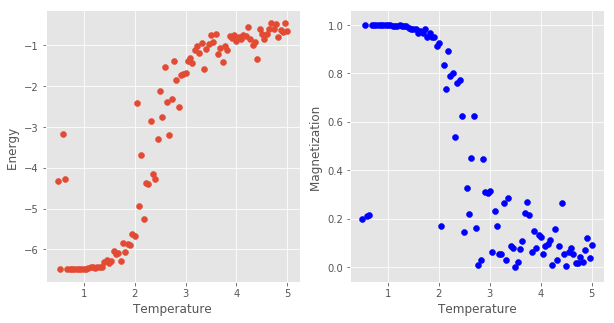

In [170]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Да, графики хорошо соотносятся с теорией. С увеличением температуры собственная намагниченность пропадает

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [171]:

N = 64
state = getInitialState(N)

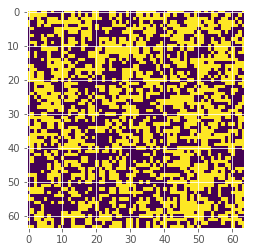

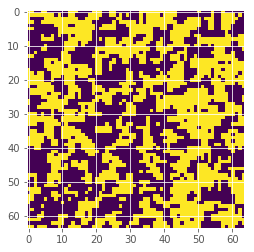

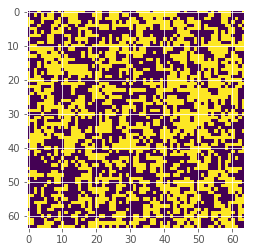

In [186]:
plt.figure()
plt.imshow(state)

plt.figure()
plt.imshow(makeFlip(0.5, state))

plt.figure()
plt.imshow(makeFlip(10, state))
plt.show()

Малые температуры: спины образуют домены,
Большие температуры: спины расположены хаотично.